# Task 1 Simple Prediction Using Supervised ML

The goal of this task is to predict the percentage score of a student based on the number of hours they study per day. Data is derived from: http://bit.ly/w-data

In [1]:
#Importing libraries required to execute this task

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Loading the content of data from the provided link

url = 'http://bit.ly/w-data'
data = pd.read_csv(url)
print(data.head(10))

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
7    5.5      60
8    8.3      81
9    2.7      25


In [3]:
#Describing the dataset

data.describe

<bound method NDFrame.describe of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [4]:
# Separating the features and target Variable
X = data['Hours'].values.reshape(-1, 1) 
y = data['Scores'].values  


#Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, shuffle=False, random_state=42)


In [5]:
#Initiate the training process, fitting the model to the training data

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
y_predict= regressor.predict(X_train)

print("Training complete.")

Training complete.


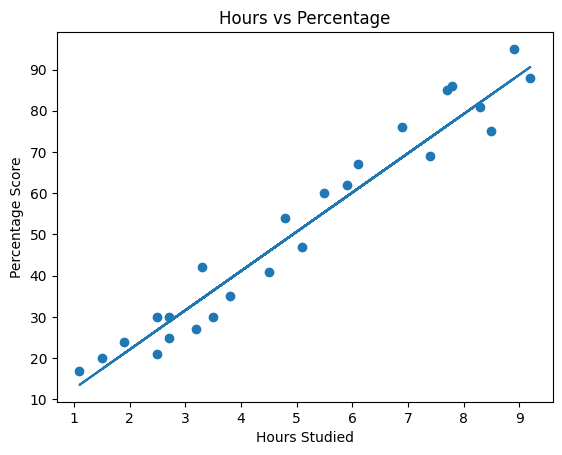

In [6]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

In [7]:
y_test

array([30, 54, 35, 76, 86])

In [8]:
y_predict

array([26.83224828, 51.58525212, 33.49651854, 83.95456485, 36.35263437,
       17.31186218, 90.61883511, 55.39340656, 82.05048763, 28.73632549,
       76.33825597, 59.201561  , 45.87302047, 34.44855715, 13.50370774,
       87.76271928, 26.83224828, 21.12001662, 61.10563822, 73.48214014])

In [9]:
#Create a dataframe comparing the actual vs predicted values for the test set 

print('Test Score')
print(regressor.score(X_test, y_test))
print('Training Score')
print(regressor.score(X_train, y_train))

data = pd.DataFrame({'Actual': y_test,'Predicted': y_predict[:5]})
data

Test Score
0.9273291976521455
Training Score
0.9554562450839484


,Actual,Predicted
0,30,26.832248
1,54,51.585252
2,35,33.496519
3,76,83.954565
4,86,36.352634


In [10]:
#Predict the student's score if they studied for 9.25 hours
print('Score of student who studied for 9.25 hours a day', regressor.predict([[9.25]]))

Score of student who studied for 9.25 hours a day [91.09485442]
